# NLP

# PDF Reader

In [141]:
import PyPDF2

In [142]:
pdf_path = 'user-manual.pdf'

In [143]:
pdf_file = open(pdf_path, 'rb')

In [144]:
pdf_reader = PyPDF2.PdfReader(pdf_file)

In [149]:
len(pdf_reader.pages)

78

In [5]:
text = ''
for page in pdf_reader.pages:
    text += page.extract_text()

In [6]:
pdf_file.close()

In [137]:
text

DeprecationError: reader.numPages is deprecated and was removed in PyPDF2 3.0.0. Use len(reader.pages) instead.

# Image reading using teseract and CV2

In [8]:
import cv2

In [9]:
import pytesseract

In [10]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [11]:
pytesseract.get_tesseract_version()

<Version('5.3.1.20230401')>

In [12]:
image_path = 'great_learning_logo.png'

In [13]:
from PIL import Image

In [14]:
image = Image.open(image_path)

In [15]:
text = pytesseract.image_to_string(image)

In [16]:
text

'4 Great\nLearning\n\nPOWER AHEAD\n'

# <a id = "link_basics"></a>NLP Preprocessing

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
sentence = 'At eight o clock on Thursday morning Arthur didnt feel very good . good'
tokens = nltk.word_tokenize(sentence)
print(tokens)

['At', 'eight', 'o', 'clock', 'on', 'Thursday', 'morning', 'Arthur', 'didnt', 'feel', 'very', 'good', '.', 'good']


In [19]:
tokens.count('good')

2

HTML Tag Removal

In [20]:
import re, string, unicodedata
import nltk                                   # Natural language processing tool-kit
#import contractions
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet    # Stopwords, and wordnet corpus
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import re, string, unicodedata
import pandas as pd
import nltk           
                        # Natural language processing tool-kit
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
from bs4 import BeautifulSoup


def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

In [22]:
dataset = pd.read_csv('corporate_messaging_dfe.csv')

In [23]:
dataset.head(3)

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,category,category_confidence,category_gold,id,screenname,text
0,662822308,False,finalized,3,2015-02-18T04:31:00,Information,1.0,NaN,436528000000000000,Barclays,Barclays CEO stresses the importance of regula...
1,662822309,False,finalized,3,2015-02-18T13:55:00,Information,1.0,NaN,386013000000000000,Barclays,Barclays announces result of Rights Issue http...
2,662822310,False,finalized,3,2015-02-18T08:43:00,Information,1.0,NaN,379580000000000000,Barclays,Barclays publishes its prospectus for its �5.8...


In [24]:
# Here we are going to deal with text data, so we seperate out the text column in a new dataframe: data
data = dataset.drop(['golden', 'unit_state', 'trusted_judgments', 'last_judgment_at', 'category', 'category_confidence', 'category_gold', 'screenname'], axis=1)

In [25]:
data.head(3)

,unit_id,id,text
0,662822308,436528000000000000,Barclays CEO stresses the importance of regula...
1,662822309,386013000000000000,Barclays announces result of Rights Issue http...
2,662822310,379580000000000000,Barclays publishes its prospectus for its �5.8...


In [26]:
# First row of data.
pd.set_option('display.max_colwidth', None) # It will enable the entire row visible with truncation of the text. (We can see full text.)
data.loc[[0]]

,unit_id,id,text
0,662822308,436528000000000000,Barclays CEO stresses the importance of regulatory and cultural reform in financial services at Brussels conference http://t.co/Ge9Lp7hpyG


In [27]:
# Removal of the http link using Regular Expression.
for i, row in data.iterrows():
    clean_text = re.sub(r"http\S+", "", data.at[i, 'text'])
    data.at[i,'text'] = clean_text
data.head()

,unit_id,id,text
0,662822308,436528000000000000,Barclays CEO stresses the importance of regulatory and cultural reform in financial services at Brussels conference
1,662822309,386013000000000000,Barclays announces result of Rights Issue
2,662822310,379580000000000000,Barclays publishes its prospectus for its �5.8bn Rights Issue:
3,662822311,367530000000000000,Barclays Group Finance Director Chris Lucas is to step down at the end of the week due to ill health
4,662822312,360385000000000000,Barclays announces that Irene McDermott Brown has been appointed as Group Human Resources Director


In [28]:
# Tokenize the words of whole dataframe.
for i, row in data.iterrows():
    text = data.at[i, 'text']
    words = nltk.word_tokenize(text)
    data.at[i,'text'] = words
data.head()

,unit_id,id,text
0,662822308,436528000000000000,"[Barclays, CEO, stresses, the, importance, of, regulatory, and, cultural, reform, in, financial, services, at, Brussels, conference]"
1,662822309,386013000000000000,"[Barclays, announces, result, of, Rights, Issue]"
2,662822310,379580000000000000,"[Barclays, publishes, its, prospectus, for, its, �5.8bn, Rights, Issue, :]"
3,662822311,367530000000000000,"[Barclays, Group, Finance, Director, Chris, Lucas, is, to, step, down, at, the, end, of, the, week, due, to, ill, health]"
4,662822312,360385000000000000,"[Barclays, announces, that, Irene, McDermott, Brown, has, been, appointed, as, Group, Human, Resources, Director]"


In [29]:
strip_html_tags('<html><h2>Some important text</h2></html>')

'Some important text'

In [30]:
text1 = """<h1>This is the title</h1>
            <b>This is bold text</b>
            <i>This is italicized Text</i>
            <img src="another html tag"/>
            <a href="Apart from the others"> This is also here!</a>
            “Love all, trust a few, do wrong to none.” 
            ― William Shakespeare, All's Well That Ends Well

            “All the world's a stage,
            And all the men and women merely players;
            They have their exits and their entrances;
            And one man in his time plays many parts,
            His acts being seven ages.” 
            ― William Shakespeare, As You Like It

            "How old are you," asked Jem, "four-and-a-half?"

            "Goin' on seven."

            "Shoot no wonder, then," said Jem, jerking his thumb at me. "Scout yonder's been readin' ever since she was born, 
            and she ain't even started to school yet. You look right puny for goin' on seven."

            "I'm little but I'm old," he said.
            - To Kill a Mockingbird

            Le dîner, Clémence, Anaïs, Raphaël, Voilà !

            something... is! not right() with.,; this :: line.
            
            &nbsp;&nbsp;
            
            11    42   1024   2048
            {{There are double curly braces.}}
            {Here are single curly braces.}
            </body>
            </html>"""

In [31]:
def denoise_text(text):
    text = strip_html_tags(text)
    # Any other step can also be added here according to need e.g we can add code to remove string inside the curly braces.
    return text

In [32]:
text1 = denoise_text(text1)
print(text1)

This is the title
This is bold text
This is italicized Text

 This is also here!
            “Love all, trust a few, do wrong to none.” 
            ― William Shakespeare, All's Well That Ends Well

            “All the world's a stage,
            And all the men and women merely players;
            They have their exits and their entrances;
            And one man in his time plays many parts,
            His acts being seven ages.” 
            ― William Shakespeare, As You Like It

            "How old are you," asked Jem, "four-and-a-half?"

            "Goin' on seven."

            "Shoot no wonder, then," said Jem, jerking his thumb at me. "Scout yonder's been readin' ever since she was born, 
            and she ain't even started to school yet. You look right puny for goin' on seven."

            "I'm little but I'm old," he said.
            - To Kill a Mockingbird

            Le dîner, Clémence, Anaïs, Raphaël, Voilà !

            something... is! not right() with.,; th

In [33]:
#remove accented characters
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [34]:
remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

In [35]:
#tokenization
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer=ToktokTokenizer()
text= "The , and , if are stopwords, computer is not"
tokens=tokenizer.tokenize(text)
print(tokens)

['The', ',', 'and', ',', 'if', 'are', 'stopwords', ',', 'computer', 'is', 'not']


In [36]:
print('Number of words is: ', len(tokens))

Number of words is:  11


In [37]:
stopword_list = nltk.corpus.stopwords.words('english')
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [38]:
stopword_list.remove('no')
stopword_list.remove('not')

In [39]:
stopword_list.append('pep')

In [40]:
stopword_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
text= "The , and , if are stopwords, computer is not"
tokens = tokenizer.tokenize(text)
tokens = [token.strip() for token in tokens]

In [42]:
tokens

['The',
 ',',
 'and',
 ',',
 'if',
 'are',
 'stopwords',
 ',',
 'computer',
 'is',
 'not']

In [43]:
filtered_tokens=[token for token in tokens if token not in stopword_list]
filtered_tokens

['The', ',', ',', 'stopwords', ',', 'computer', 'not']

In [44]:
#remove special characters
import re
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          remove_digits=True)

'Well this was fun What do you think '

In [150]:
#stemming
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'My system keep crash hi crash yesterday, our crash daili'

# Spacy - BASIC NLP  

In [151]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [152]:
doc = nlp(u'Tesla is looking at buying U.S. startup for $6 million')

In [153]:
for token in doc:
    print(token.text, token.pos_, token.dep_)

Tesla PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.S. PROPN compound
startup NOUN dobj
for ADP prep
$ SYM quantmod
6 NUM compound
million NUM pobj


In [154]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x1f102d6f310>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x1f102d6d900>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x1f1021eef40>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x1f1021dd460>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x1f1dd82e380>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x1f102e92f40>)]

In [155]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer']

In [157]:
doc[0]

Tesla

In [158]:
doc[0].pos_

'PROPN'

In [160]:
print(doc[4].text)
print(doc[4].lemma_)

buying
buy


In [162]:
doc4 = nlp(u'This is the first sentence. This is another sentence. This is the last sentence.')

In [163]:
for sent in doc4.sents:
    print(sent)

This is the first sentence.
This is another sentence.
This is the last sentence.


In [164]:
doc2 = nlp(u"We're here to help! Send snail-mail, email support@oursite.com or visit us at http://www.oursite.com!")

for t in doc2:
    print(t)

We
're
here
to
help
!
Send
snail
-
mail
,
email
support@oursite.com
or
visit
us
at
http://www.oursite.com
!


In [165]:
doc8 = nlp(u'Apple to build a Hong Kong factory for $6 million')

for token in doc8:
    print(token.text, end=' | ')

print('\n----')

for ent in doc8.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

Apple | to | build | a | Hong | Kong | factory | for | $ | 6 | million | 
----
Apple - ORG - Companies, agencies, institutions, etc.
Hong Kong - GPE - Countries, cities, states
$6 million - MONEY - Monetary values, including unit


In [166]:
doc9 = nlp(u"Autonomous cars shift insurance liability toward manufacturers.")

for chunk in doc9.noun_chunks:
    print(chunk.text)

Autonomous cars
insurance liability
manufacturers


In [167]:
from spacy import displacy

In [168]:
doc = nlp(u'Apple is going to build a U.K. factory for $6 million.')
displacy.render(doc, style='dep', jupyter=True, options={'distance': 110})

In [184]:
doc = nlp(u'Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million.')
displacy.render(doc, style='ent', jupyter=True)

## Stemmer

In [170]:
import nltk

from nltk.stem.porter import *

In [171]:
p_stemmer = PorterStemmer()

In [172]:
words = ['run','runner','running','ran','runs','easily','fairly']

In [173]:
for word in words:
    print(word+' --> '+p_stemmer.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fairli


In [174]:
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

In [185]:
words = ['run','runner','running','ran','runs','easily','fairly']
for word in words:
    print(word+' --> '+s_stemmer.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fair


## Lemmatization

In [176]:
doc1 = nlp(u"I am a runner running in a race because I love to run since I ran today")

for token in doc1:
    print(token.text, '\t', token.pos_, '\t', token.lemma, '\t', token.lemma_)

I 	 PRON 	 4690420944186131903 	 I
am 	 AUX 	 10382539506755952630 	 be
a 	 DET 	 11901859001352538922 	 a
runner 	 NOUN 	 12640964157389618806 	 runner
running 	 VERB 	 12767647472892411841 	 run
in 	 ADP 	 3002984154512732771 	 in
a 	 DET 	 11901859001352538922 	 a
race 	 NOUN 	 8048469955494714898 	 race
because 	 SCONJ 	 16950148841647037698 	 because
I 	 PRON 	 4690420944186131903 	 I
love 	 VERB 	 3702023516439754181 	 love
to 	 PART 	 3791531372978436496 	 to
run 	 VERB 	 12767647472892411841 	 run
since 	 SCONJ 	 10066841407251338481 	 since
I 	 PRON 	 4690420944186131903 	 I
ran 	 VERB 	 12767647472892411841 	 run
today 	 NOUN 	 11042482332948150395 	 today


In [177]:
def show_lemmas(text):
    for token in text:
        print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')

In [178]:
doc2 = nlp(u"I saw eighteen mice today!")

show_lemmas(doc2)

I            PRON   4690420944186131903    I
saw          VERB   11925638236994514241   see
eighteen     NUM    9609336664675087640    eighteen
mice         NOUN   1384165645700560590    mouse
today        NOUN   11042482332948150395   today
!            PUNCT  17494803046312582752   !


In [179]:
print(nlp.Defaults.stop_words)

{'any', 'take', '’d', 'two', 'whence', 'third', 'him', 'nine', 'a', 'well', 'upon', 'had', 'whatever', 'yourself', 'put', 'anyway', 'behind', 'seem', 'whether', 'never', 'some', 'below', 'get', 'perhaps', 'formerly', 'almost', 'seemed', 'whom', 'via', 'during', 'neither', 'hereupon', 'fifteen', 'together', 'still', 'enough', 'of', 'often', 'thru', 'off', 'other', 'every', 'thus', 'thereupon', 'latterly', 'through', 'made', 'cannot', 'alone', 'did', 'may', 'thereby', 'where', 'something', 'hereby', 'really', 'my', 'very', 'top', 'we', 'though', 'twelve', 'doing', 'four', 'meanwhile', 'beyond', 'by', 'there', 'you', 'own', 'part', 'six', 'or', 'mostly', 'me', 'front', 'up', 'quite', 'whither', 'he', 'less', 'our', "'ve", 'an', 'does', 'thence', 'used', 'across', 'everywhere', 'themselves', 'will', 'is', 'ourselves', 'using', 'latter', 'each', '‘re', 'can', 'unless', 'indeed', 'amount', 'whoever', 'was', 'at', 'than', 'which', 'move', 'per', 'anyhow', 'call', 'them', 'whereas', 'further',

In [180]:
nlp.vocab['myself'].is_stop

True

In [181]:
nlp.vocab['Car'].is_stop

False

In [46]:
#lemmatization

#uncomment the below two lines to install spacy and download the language model
# !pip install spacy
#!python -m spacy download en_core_web_sm



def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'my system keep crash ! his crashed yesterday , ours crash daily'

In [47]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)        # Append processed words to new list.
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []                            # Create empty list to store pre-processed words.
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    return words

In [48]:
text1

'This is the title\nThis is bold text\nThis is italicized Text\n\n This is also here!\n            “Love all, trust a few, do wrong to none.” \n            ― William Shakespeare, All\'s Well That Ends Well\n\n            “All the world\'s a stage,\n            And all the men and women merely players;\n            They have their exits and their entrances;\n            And one man in his time plays many parts,\n            His acts being seven ages.” \n            ― William Shakespeare, As You Like It\n\n            "How old are you," asked Jem, "four-and-a-half?"\n\n            "Goin\' on seven."\n\n            "Shoot no wonder, then," said Jem, jerking his thumb at me. "Scout yonder\'s been readin\' ever since she was born, \n            and she ain\'t even started to school yet. You look right puny for goin\' on seven."\n\n            "I\'m little but I\'m old," he said.\n            - To Kill a Mockingbird\n\n            Le dîner, Clémence, Anaïs, Raphaël, Voilà !\n\n            so

In [49]:
words = nltk.word_tokenize(text1)     # list of words.
print(words)
print('Number of words is: ', len(words))

['This', 'is', 'the', 'title', 'This', 'is', 'bold', 'text', 'This', 'is', 'italicized', 'Text', 'This', 'is', 'also', 'here', '!', '“', 'Love', 'all', ',', 'trust', 'a', 'few', ',', 'do', 'wrong', 'to', 'none.', '”', '―', 'William', 'Shakespeare', ',', 'All', "'s", 'Well', 'That', 'Ends', 'Well', '“', 'All', 'the', 'world', "'s", 'a', 'stage', ',', 'And', 'all', 'the', 'men', 'and', 'women', 'merely', 'players', ';', 'They', 'have', 'their', 'exits', 'and', 'their', 'entrances', ';', 'And', 'one', 'man', 'in', 'his', 'time', 'plays', 'many', 'parts', ',', 'His', 'acts', 'being', 'seven', 'ages.', '”', '―', 'William', 'Shakespeare', ',', 'As', 'You', 'Like', 'It', '``', 'How', 'old', 'are', 'you', ',', "''", 'asked', 'Jem', ',', '``', 'four-and-a-half', '?', "''", '``', 'Goin', "'", 'on', 'seven', '.', "''", '``', 'Shoot', 'no', 'wonder', ',', 'then', ',', "''", 'said', 'Jem', ',', 'jerking', 'his', 'thumb', 'at', 'me', '.', '``', 'Scout', 'yonder', "'s", 'been', 'readin', "'", 'ever',

In [50]:
words = normalize(words)
print(words)
print('Number of words is: ', len(words))

['title', 'bold', 'text', 'italicized', 'text', 'also', 'love', 'trust', 'wrong', 'none', 'william', 'shakespeare', 'well', 'ends', 'well', 'world', 'stage', 'men', 'women', 'merely', 'players', 'exits', 'entrances', 'one', 'man', 'time', 'plays', 'many', 'parts', 'acts', 'seven', 'ages', 'william', 'shakespeare', 'like', 'old', 'asked', 'jem', 'fourandahalf', 'goin', 'seven', 'shoot', 'wonder', 'said', 'jem', 'jerking', 'thumb', 'scout', 'yonder', 'readin', 'ever', 'since', 'born', 'ai', 'nt', 'even', 'started', 'school', 'yet', 'look', 'right', 'puny', 'goin', 'seven', 'little', 'old', 'said', 'kill', 'mockingbird', 'le', 'diner', 'clemence', 'anais', 'raphael', 'voila', 'something', 'right', 'line', '11', '42', '1024', '2048', 'double', 'curly', 'braces', 'single', 'curly', 'braces']
Number of words is:  88


In [51]:
# Iterate the normalize funtion over whole data.
for i, row in data.iterrows():
    words = data.at[i, 'text']
    words = normalize(words)
    data.at[i,'text'] = words

In [52]:
data.head()

,unit_id,id,text
0,662822308,436528000000000000,"[barclays, ceo, stresses, importance, regulatory, cultural, reform, financial, services, brussels, conference]"
1,662822309,386013000000000000,"[barclays, announces, result, rights, issue]"
2,662822310,379580000000000000,"[barclays, publishes, prospectus, 58bn, rights, issue]"
3,662822311,367530000000000000,"[barclays, group, finance, director, chris, lucas, step, end, week, due, ill, health]"
4,662822312,360385000000000000,"[barclays, announces, irene, mcdermott, brown, appointed, group, human, resources, director]"


In [53]:
import nltk
nltk.download('wordnet')
def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems, lemmas

stems, lemmas = stem_and_lemmatize(words)
print('Stemmed:\n', stems)
print('\nLemmatized:\n', lemmas)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Stemmed:
 ['z', 'bhutt', 'problem', 'food', 'amp', 'land', 'system', 'includ', 'land', 'acqu', 'commod', 'spec', 'affect', 'food', 'pric', 'amp', 'lack', 'discuss', 'nins2013']

Lemmatized:
 ['z', 'bhutta', 'problems', 'food', 'amp', 'land', 'systems', 'include', 'land', 'acquistion', 'commodity', 'speculation', 'affect', 'food', 'price', 'amp', 'lack', 'discussion', 'nins2013']


# Vocabulary and Entity Matching

In [192]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

In [193]:
pattern1 = [{'LOWER': 'solarpower'}]
pattern2 = [{'LOWER': 'solar'}, {'LOWER': 'power'}]
pattern3 = [{'LOWER': 'solar'}, {'IS_PUNCT': True}, {'LOWER': 'power'}]

In [195]:
matcher.add('SolarPower1', [pattern1])
matcher.add('SolarPower2', [pattern2])
matcher.add('SolarPower3', [pattern3])

In [196]:
doc = nlp(u'The Solar Power industry continues to grow as demand \
for solarpower increases. Solar-power cars are gaining popularity.')

In [197]:
found_matches = matcher(doc)
print(found_matches)

[(3587797832942597511, 1, 3), (5461441303532127645, 10, 11), (2910079970562885188, 13, 16)]


In [198]:
for match_id, start, end in found_matches:
    string_id = nlp.vocab.strings[match_id]  # get string representation
    span = doc[start:end]                    # get the matched span
    print(match_id, string_id, start, end, span.text)

3587797832942597511 SolarPower2 1 3 Solar Power
5461441303532127645 SolarPower1 10 11 solarpower
2910079970562885188 SolarPower3 13 16 Solar-power


# Parts of Speech Tagging

In [199]:
doc = nlp(u"The quick brown fox jumped over the lazy dog's back.")

In [200]:
for token in doc:
    print(f'{token.text:{10}} {token.pos_:{8}} {token.tag_:{6}} {spacy.explain(token.tag_)}')

The        DET      DT     determiner
quick      ADJ      JJ     adjective
brown      ADJ      JJ     adjective
fox        NOUN     NN     noun, singular or mass
jumped     VERB     VBD    verb, past tense
over       ADP      IN     conjunction, subordinating or preposition
the        DET      DT     determiner
lazy       ADJ      JJ     adjective
dog        NOUN     NN     noun, singular or mass
's         PART     POS    possessive ending
back       NOUN     NN     noun, singular or mass
.          PUNCT    .      punctuation mark, sentence closer


In [202]:
# Write a function to display basic entity info:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))
    else:
        print('No named entities found.')

In [203]:
doc = nlp(u'May I go to Washington, DC next May to see the Washington Monument?')

In [204]:
show_ents(doc)

Washington, DC - GPE - Countries, cities, states
next May - DATE - Absolute or relative dates or periods
the Washington Monument - ORG - Companies, agencies, institutions, etc.


# <a id = "link_count"></a>CountVectorizer and TfidfVectorizer

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.dog"]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 2 1 1 1 1 1 2]]


In [55]:
# encode another document
text2 = ["the puppy dog"]
vector = vectorizer.transform(text2)
print(vector.toarray())

[[0 1 0 0 0 0 0 1]]


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.",
        "The dog.",
        "The fox"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]
(1, 8)
[[0.36388646 0.27674503 0.27674503 0.36388646 0.36388646 0.36388646
  0.36388646 0.42983441]]


# <a id = "link_vader"></a>VaderSentiment

In [57]:
from textblob import TextBlob
text=TextBlob("I am happy")
print(text.sentiment)

Sentiment(polarity=0.8, subjectivity=1.0)


In [58]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
text=SentimentIntensityAnalyzer()
score=text.polarity_scores("I am happy")
print(score)


{'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}


In [59]:
text1=TextBlob("I am sad")

In [60]:
text1=SentimentIntensityAnalyzer()
score=text1.polarity_scores("I am sad")
print(score)


{'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'compound': -0.4767}


# <a id = "link_count1"></a>Sentiment Analysis

In [61]:
import pandas as pd       
train = pd.read_csv("labeledTrainData.tsv", header=0,delimiter="\t", quoting=3)

In [62]:
train.shape

(25000, 3)

In [63]:
train.columns.values

array(['id', 'sentiment', 'review'], dtype=object)

In [64]:
print (train["review"][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [65]:
example1 = BeautifulSoup(train["review"][0])

In [66]:
print (train["review"][0])
print (example1.get_text())

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [67]:
import re
letters_only = re.sub("[^a-zA-Z]"," ",example1.get_text() )
print (letters_only)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [68]:
lower_case = letters_only.lower() 

In [69]:
words = lower_case.split()

In [70]:
from nltk.corpus import stopwords
print (stopwords.words("english")) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [71]:
words = [w for w in words if not w in stopwords.words("english")]
print (words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [72]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))

In [73]:
clean_review = review_to_words( train["review"][0] )
print (clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [74]:
# Get the number of reviews based on the dataframe column size
num_reviews = train["review"].size

# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in range( 0, num_reviews ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_train_reviews.append( review_to_words( train["review"][i] ) )

In [75]:
clean_train_reviews[0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [76]:
clean_train_reviews[24000]

'scientist girl friend driving speeding causes car crash escapes unharmed decapitated saves head brings house keeps alive proceeds search models strippers perfect body head crippled assistant watches head starts talking telepathic telepathetic link deformed monster kept closet see pretty stupid stuff certain fondness grew late local tv station showed movie times year exaggeration showed always saturday afternoon tv uncut seeing tv back great explicit blood gore along gruesome monster sleazy sexploitation cares good seeing realize lousy really acting perfectly wretched production values nonexistent script pretty dumb aside still pretty disgusting gore dull stuff also mild cat fight two women admittedly great monster end also add ending leaves tons loose ends one hand interesting example exploitation film utter trash either way good movie must see one time horror gore fans also head laugh pretty creepy note end credits gets title wrong calling head die'

In [77]:
print ("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

Creating the bag of words...



In [78]:
print (train_data_features.shape)

(25000, 5000)


In [79]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
print (vocab)

['abandoned', 'abc', 'abilities', 'ability', 'able', 'abraham', 'absence', 'absent', 'absolute', 'absolutely', 'absurd', 'abuse', 'abusive', 'abysmal', 'academy', 'accent', 'accents', 'accept', 'acceptable', 'accepted', 'access', 'accident', 'accidentally', 'accompanied', 'accomplished', 'according', 'account', 'accuracy', 'accurate', 'accused', 'achieve', 'achieved', 'achievement', 'acid', 'across', 'act', 'acted', 'acting', 'action', 'actions', 'activities', 'actor', 'actors', 'actress', 'actresses', 'acts', 'actual', 'actually', 'ad', 'adam', 'adams', 'adaptation', 'adaptations', 'adapted', 'add', 'added', 'addicted', 'adding', 'addition', 'adds', 'adequate', 'admire', 'admit', 'admittedly', 'adorable', 'adult', 'adults', 'advance', 'advanced', 'advantage', 'adventure', 'adventures', 'advertising', 'advice', 'advise', 'affair', 'affect', 'affected', 'afford', 'aforementioned', 'afraid', 'africa', 'african', 'afternoon', 'afterwards', 'age', 'aged', 'agent', 'agents', 'ages', 'aging'

In [80]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print (count, tag)

187 abandoned
125 abc
108 abilities
454 ability
1259 able
85 abraham
116 absence
83 absent
352 absolute
1485 absolutely
306 absurd
192 abuse
91 abusive
98 abysmal
297 academy
485 accent
203 accents
300 accept
130 acceptable
144 accepted
92 access
318 accident
200 accidentally
88 accompanied
124 accomplished
296 according
186 account
81 accuracy
284 accurate
123 accused
179 achieve
139 achieved
124 achievement
90 acid
971 across
1251 act
658 acted
6490 acting
3354 action
311 actions
83 activities
2389 actor
4486 actors
1219 actress
369 actresses
394 acts
793 actual
4237 actually
148 ad
302 adam
98 adams
453 adaptation
80 adaptations
154 adapted
810 add
439 added
78 addicted
166 adding
347 addition
337 adds
113 adequate
124 admire
621 admit
134 admittedly
101 adorable
510 adult
376 adults
100 advance
90 advanced
153 advantage
510 adventure
204 adventures
91 advertising
259 advice
90 advise
346 affair
93 affect
113 affected
104 afford
126 aforementioned
343 afraid
212 africa
255 african
1

140 closely
206 closer
94 closest
103 closet
177 closing
328 clothes
110 clothing
107 clown
434 club
224 clue
123 clues
105 clumsy
604 co
102 coach
80 coast
241 code
106 coffee
109 coherent
571 cold
132 cole
343 collection
496 college
106 colonel
402 color
144 colorful
199 colors
138 colour
206 columbo
218 com
109 combat
231 combination
94 combine
198 combined
3189 come
159 comedian
315 comedic
439 comedies
3244 comedy
2484 comes
80 comfort
110 comfortable
901 comic
171 comical
133 comics
1062 coming
99 command
653 comment
318 commentary
100 commented
779 comments
239 commercial
116 commercials
127 commit
195 committed
509 common
103 communist
290 community
80 companies
104 companion
515 company
325 compare
538 compared
96 comparing
251 comparison
81 compassion
87 compelled
385 compelling
140 competent
127 competition
115 complain
139 complaint
1035 complete
1889 completely
427 complex
90 complexity
178 complicated
111 composed
82 composer
468 computer
180 con
120 conceived
520 concept

450 glad
157 glass
80 glasses
118 glenn
149 glimpse
94 global
104 glorious
147 glory
142 glover
5157 go
137 goal
1207 god
134 godfather
105 godzilla
2441 goes
4101 going
295 gold
123 goldberg
259 golden
754 gone
241 gonna
15140 good
106 goodness
161 goofy
245 gordon
1038 gore
368 gorgeous
234 gory
3583 got
136 gothic
129 gotta
286 gotten
424 government
109 grab
80 grabs
328 grace
462 grade
118 gradually
86 graham
307 grand
98 grandfather
127 grandmother
262 grant
201 granted
239 graphic
169 graphics
97 grasp
237 gratuitous
189 grave
121 gray
89 grayson
9058 great
174 greater
745 greatest
154 greatly
82 greatness
86 greed
91 greedy
113 greek
404 green
83 greg
79 gregory
250 grew
158 grey
79 grief
102 griffith
188 grim
103 grinch
150 gripping
196 gritty
180 gross
353 ground
1034 group
108 groups
224 grow
297 growing
252 grown
134 grows
163 gruesome
91 guarantee
165 guard
1310 guess
99 guessed
151 guessing
133 guest
125 guide
142 guilt
198 guilty
563 gun
94 gundam
283 guns
143 guts
3035 g

367 mix
287 mixed
103 mixture
83 miyazaki
83 mm
157 mob
240 model
105 models
929 modern
122 modesty
89 molly
367 mom
1112 moment
1663 moments
84 mon
2362 money
85 monk
132 monkey
98 monkeys
655 monster
277 monsters
103 montage
95 montana
148 month
272 months
432 mood
98 moody
296 moon
227 moore
366 moral
122 morality
275 morgan
266 morning
83 moronic
98 morris
941 mostly
1524 mother
449 motion
122 motivation
95 motivations
103 motives
196 mountain
110 mountains
168 mouse
332 mouth
727 move
322 moved
206 movement
115 movements
530 moves
44031 movie
7663 movies
854 moving
1448 mr
260 mrs
350 ms
180 mst
86 mtv
9765 much
140 multi
190 multiple
108 mummy
86 mundane
1063 murder
260 murdered
179 murderer
109 murderous
367 murders
213 murphy
81 murray
96 museum
3056 music
992 musical
175 musicals
85 muslim
3249 must
97 myers
105 mysteries
404 mysterious
850 mystery
98 nail
218 naive
437 naked
1604 name
799 named
96 namely
391 names
227 nancy
192 narration
424 narrative
125 narrator
342 nasty
8

105 rick
118 rid
88 ridden
413 ride
964 ridiculous
112 ridiculously
155 riding
3313 right
184 rights
312 ring
185 rings
323 rip
138 ripped
235 rise
79 rises
89 rising
162 risk
80 rita
135 ritter
161 rival
289 river
99 riveting
435 road
252 rob
92 robbery
80 robbins
951 robert
142 roberts
248 robin
93 robinson
217 robot
112 robots
155 rochester
876 rock
102 rocket
138 rocks
86 rocky
203 roger
170 rogers
3188 role
1112 roles
338 roll
83 rolled
183 rolling
107 roman
694 romance
854 romantic
117 romero
81 romp
183 ron
945 room
99 rooms
87 rooney
122 root
82 roots
244 rose
82 ross
96 roth
96 rotten
186 rough
244 round
201 routine
132 row
228 roy
87 royal
90 rubber
275 rubbish
94 ruby
203 ruin
227 ruined
84 ruins
86 rukh
188 rule
231 rules
1218 run
992 running
513 runs
110 rural
139 rush
138 rushed
208 russell
79 russia
302 russian
121 ruth
101 ruthless
224 ryan
84 sabrina
127 sacrifice
996 sad
112 sadistic
575 sadly
112 sadness
227 safe
98 safety
101 saga
2196 said
246 sake
134 sally
456 sa

613 telling
880 tells
122 temple
829 ten
215 tend
101 tender
86 tends
152 tense
541 tension
167 term
433 terms
1638 terrible
274 terribly
433 terrific
142 terrifying
123 territory
197 terror
103 terrorist
89 terrorists
112 terry
236 test
83 testament
210 texas
158 text
745 th
439 thank
182 thankfully
472 thanks
345 thats
828 theater
229 theaters
319 theatre
228 theatrical
816 theme
423 themes
192 theory
335 therefore
116 thick
158 thief
360 thin
4526 thing
3688 things
7296 think
1179 thinking
437 thinks
739 third
141 thirty
254 thomas
85 thompson
350 thoroughly
4566 though
3437 thought
98 thoughtful
219 thoughts
145 thousand
153 thousands
116 threat
126 threatening
2295 three
112 threw
111 thrill
895 thriller
151 thrillers
157 thrilling
129 thrills
122 throat
1360 throughout
402 throw
173 throwing
409 thrown
167 throws
97 thru
111 thugs
136 thumbs
418 thus
124 ticket
102 tie
149 tied
104 ties
87 tiger
182 tight
213 till
309 tim
12724 time
121 timeless
3235 times
169 timing
94 timon
118

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(verbose=2,n_jobs=-1,n_estimators = 10) 
# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
print ("Training the random forest...")
forest = forest.fit( train_data_features, train["sentiment"] )
# random forest performance through cross vaidation 

Training the random forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    4.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.3s finished


In [82]:
print (forest)

RandomForestClassifier(n_estimators=10, n_jobs=-1, verbose=2)


In [83]:
print (np.mean(cross_val_score(forest,train_data_features,train["sentiment"],cv=10)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    8.0s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    5.2s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Paralle

0.77708


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


In [84]:
# Read the test data
test = pd.read_csv("testData.tsv", header=0, delimiter="\t", \
                   quoting=3 )

# Verify that there are 25,000 rows and 2 columns
print (test.shape)

# Create an empty list and append the clean reviews one by one
num_reviews = len(test["review"])
clean_test_reviews = [] 

print ("Cleaning and parsing the test set movie reviews...\n")
for i in range(0,num_reviews):
    if( (i+1) % 1000 == 0 ):
        print ("Review %d of %d\n" % (i+1, num_reviews))
    clean_review = review_to_words( test["review"][i] )
    clean_test_reviews.append( clean_review )

# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

# Use the random forest to make sentiment label predictions
result = forest.predict(test_data_features)
print (result)

# Copy the results to a pandas dataframe with an "id" column and
# a "sentiment" column
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )

# Use pandas to write the comma-separated output file
output.to_csv( "Bag_of_Words_model.csv", index=False, quoting=3 )

(25000, 2)
Cleaning and parsing the test set movie reviews...

Review 1000 of 25000

Review 2000 of 25000

Review 3000 of 25000

Review 4000 of 25000

Review 5000 of 25000

Review 6000 of 25000

Review 7000 of 25000

Review 8000 of 25000

Review 9000 of 25000

Review 10000 of 25000

Review 11000 of 25000

Review 12000 of 25000

Review 13000 of 25000

Review 14000 of 25000

Review 15000 of 25000

Review 16000 of 25000

Review 17000 of 25000

Review 18000 of 25000

Review 19000 of 25000

Review 20000 of 25000

Review 21000 of 25000

Review 22000 of 25000

Review 23000 of 25000

Review 24000 of 25000

Review 25000 of 25000

[1 0 1 ... 1 1 1]


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


# SMS Spam clasifier

In [209]:
import numpy as np
import pandas as pd
df = pd.read_csv('smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,2


In [210]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [211]:
from sklearn.model_selection import train_test_split

X = df['message']  # this time we want to look at the text
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [212]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(3733, 7082)

In [213]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(3733, 7082)

In [214]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

(3733, 7082)

In [215]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

In [216]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [217]:
# Form a prediction set
predictions = text_clf.predict(X_test)

In [220]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[1586    7]
 [  12  234]]


In [221]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

    accuracy                           0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [219]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.989668297988037


# <a id = "link_mul"></a>Multilabel Review: Amazon food review

In [85]:
import re, string, unicodedata                          # Import Regex, string and unicodedata.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [86]:
data = pd.read_csv("Reviews.csv")

In [87]:
data.shape

(568454, 10)

In [88]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [89]:
# Taking only 50000 entries for demonstration purpose. As full data will take more time to process.
# Only keeping score and Text columns from the data, as these are useful for our analysis.

data = data.loc[:49999, ['Score', 'Text']]

In [90]:
data.isnull().sum(axis=0)                                # Check for NULL values.

Score    0
Text     0
dtype: int64

In [91]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()                                 # Check first 5 rows of data

,Score,Text
0,5,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,4,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,2,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [92]:
data.shape                                # Shape of data

(50000, 2)

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data

We have used NLTK library to tokenize words , remove stopwords and lemmatize the remaining words.

In [93]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['Text'] = data['Text'].apply(lambda x: strip_html(x))
data.head()

,Score,Text
0,5,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,4,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,2,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [94]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['Text'] = data['Text'].apply(lambda x: remove_numbers(x))
data.head()

,Score,Text
0,5,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,4,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,2,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [95]:
data['Text'] = data.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1) # Tokenization of data

In [96]:
data.head() 

,Score,Text
0,5,"[I, have, bought, several, of, the, Vitality, canned, dog, food, products, and, have, found, them, all, to, be, of, good, quality, ., The, product, looks, more, like, a, stew, than, a, processed, meat, and, it, smells, better, ., My, Labrador, is, finicky, and, she, appreciates, this, product, better, than, most, .]"
1,1,"[Product, arrived, labeled, as, Jumbo, Salted, Peanuts, ..., the, peanuts, were, actually, small, sized, unsalted, ., Not, sure, if, this, was, an, error, or, if, the, vendor, intended, to, represent, the, product, as, ``, Jumbo, '', .]"
2,4,"[This, is, a, confection, that, has, been, around, a, few, centuries, ., It, is, a, light, ,, pillowy, citrus, gelatin, with, nuts, -, in, this, case, Filberts, ., And, it, is, cut, into, tiny, squares, and, then, liberally, coated, with, powdered, sugar, ., And, it, is, a, tiny, mouthful, of, heaven, ., Not, too, chewy, ,, and, very, flavorful, ., I, highly, recommend, this, yummy, treat, ., If, you, are, familiar, with, the, story, of, C.S, ., Lewis, ', ``, The, Lion, ,, The, Witch, ,, and, The, Wardrobe, '', -, this, is, the, treat, that, seduces, Edmund, into, selling, ...]"
3,2,"[If, you, are, looking, for, the, secret, ingredient, in, Robitussin, I, believe, I, have, found, it, ., I, got, this, in, addition, to, the, Root, Beer, Extract, I, ordered, (, which, was, good, ), and, made, some, cherry, soda, ., The, flavor, is, very, medicinal, .]"
4,5,"[Great, taffy, at, a, great, price, ., There, was, a, wide, assortment, of, yummy, taffy, ., Delivery, was, very, quick, ., If, your, a, taffy, lover, ,, this, is, a, deal, .]"


In [97]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))

In [98]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['Text'] = data.apply(lambda row: normalize(row['Text']), axis=1)
data.head()

,Score,Text
0,5,buy several vitality can dog food products find good quality product look like stew process meat smell better labrador finicky appreciate product better
1,1,product arrive label jumbo salt peanuts peanuts actually small size unsalted not sure error vendor intend represent product jumbo
2,4,confection around centuries light pillowy citrus gelatin nut case filberts cut tiny square liberally coat powder sugar tiny mouthful heaven not chewy flavorful highly recommend yummy treat familiar story cs lewis lion witch wardrobe treat seduce edmund sell brother sisters witch
3,2,look secret ingredient robitussin believe find get addition root beer extract order good make cherry soda flavor medicinal
4,5,great taffy great price wide assortment yummy taffy delivery quick taffy lover deal


In [99]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(data['Text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [100]:
data_features.shape

(50000, 1000)

In [101]:
labels = data['Score']
labels = labels.astype('int')

In [102]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=7)

In [103]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.6708400000000001


In [104]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)

[[ 627   49   53   74  593]
 [ 161  117   70   74  397]
 [ 104   64  248  166  666]
 [ 102   43   86  541 1457]
 [ 205   51  111  351 8590]]


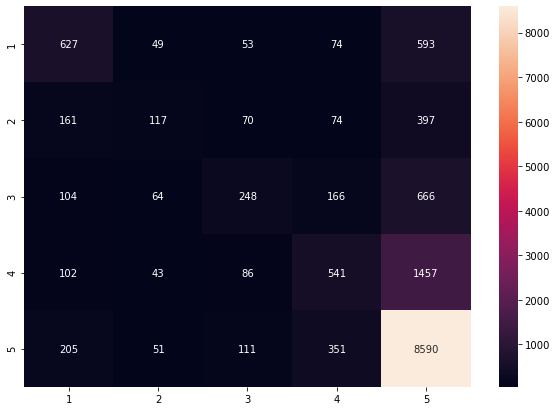

In [105]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "12345"],
                  columns = [i for i in "12345"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [106]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
data_features = vectorizer.fit_transform(data['Text'])

data_features = data_features.toarray()

data_features.shape

(50000, 1000)

In [107]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.6797200000000001


In [108]:
result = forest.predict(X_test)

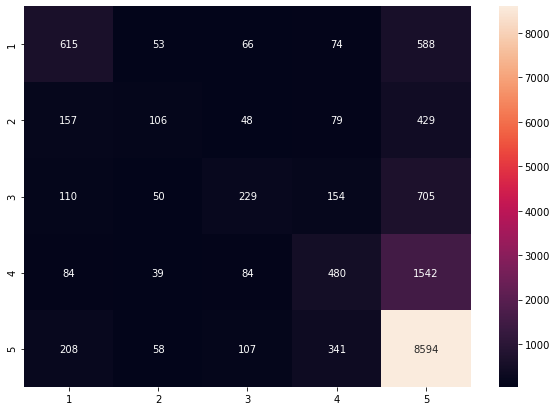

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "12345"],
                  columns = [i for i in "12345"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

# <a id = "link_mul1"></a>Multilabel Review: Airline review project

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

In [110]:
import re, string, unicodedata                        
from bs4 import BeautifulSoup                         

import numpy as np                                    
import pandas as pd                                   
import nltk                                           

nltk.download('stopwords')                            
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                     
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer   

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [111]:
data = pd.read_csv("Tweets.csv")

In [112]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [113]:
data = data.loc[:, ['airline_sentiment', 'text']]

In [114]:
pd.set_option('display.max_colwidth', None)
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [115]:
data.groupby("airline_sentiment").agg({'airline_sentiment': 'count'})

,airline_sentiment
airline_sentiment,
negative,9178
neutral,3099
positive,2363


Remove HTML

In [116]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


Remove Numbers and Special Characters

In [117]:
import re
data['text'] = data['text'].apply(lambda x:  re.sub("[^a-zA-Z]"," ",x ))

Convert to lower case

In [118]:
data['text'] = data['text'].apply(lambda x:x.lower())

In [119]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) 

In [120]:
lemmatizer = WordNetLemmatizer()
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

In [121]:
def lemmatize(words):
    #words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

In [122]:
data['text'] = data.apply(lambda row: lemmatize(row['text']), axis=1)
data.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn say
1,positive,virginamerica plus you ve add commercials to the experience tacky
2,neutral,virginamerica i didn t today must mean i need to take another trip
3,negative,virginamerica it s really aggressive to blast obnoxious entertainment in your guests face they have little recourse
4,negative,virginamerica and it s a really big bad thing about it


In [123]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) 
data.head()

,airline_sentiment,text
0,neutral,"[virginamerica, what, dhepburn, say]"
1,positive,"[virginamerica, plus, you, ve, add, commercials, to, the, experience, tacky]"
2,neutral,"[virginamerica, i, didn, t, today, must, mean, i, need, to, take, another, trip]"
3,negative,"[virginamerica, it, s, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, face, they, have, little, recourse]"
4,negative,"[virginamerica, and, it, s, a, really, big, bad, thing, about, it]"


In [124]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)        # Append processed words to new list.
   # return new_words
    return ' '.join(new_words)

In [125]:
data['text'] = data.apply(lambda row: remove_stopwords(row['text']), axis=1) 
data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,virginamerica really big bad thing


CountVectorizer

In [126]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 5000)    
data_features = vectorizer.fit_transform(data['text'])             

In [127]:
labels = data['airline_sentiment']

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=7)

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=100, n_jobs=8)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_jobs=8)
0.7273224043715847


In [130]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
def draw_cm( actual, predicted ):
    cm = confusion_matrix( y_test, result,["negative", "neutral", "positive"] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["negative", "neutral", "positive"] , yticklabels = ["negative", "neutral", "positive"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=['negative', 'neutral', 'positive'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


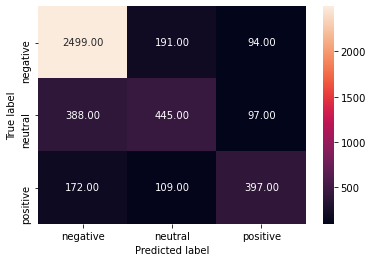

In [132]:
draw_cm( y_test, result )

TfidfVectorizer

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 5000)

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=100, n_jobs=8)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_jobs=8)
0.7167349726775957


In [135]:
result = forest.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=['negative', 'neutral', 'positive'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


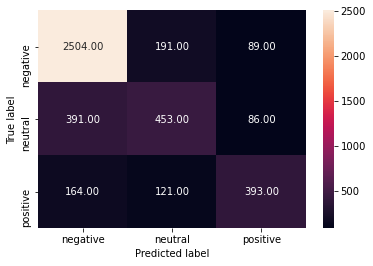

In [136]:
draw_cm( y_test, result )